# Visualisierungen 

In [3]:
#import codecs
import matplotlib.pyplot as plt
#import nltk
import numpy as np
import os
import pandas as pd
#import re
#import scipy
import seaborn as sns
#import spacy
#import statistics 

from gensim.models import KeyedVectors
from gensim.models import Word2Vec
#from gensim.models.phrases import Phraser, Phrases
#from joblib import Parallel, delayed  
#from nltk.corpus import stopwords
#from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [4]:
# trainierte (ausgerichtete) Modelle laden

w2v_bc = Word2Vec.load(os.path.join('../trained_models', 'w2v_bc_covidvoc.model'))
w2v_ac_al = Word2Vec.load(os.path.join('../trained_models', 'w2v_ac_al_covidvoc.model'))

In [5]:
# Hilfsfunktion zum Plotten ähnlicher Wörter im Vektorraum

def plot_closest_words(model, word, plot_style):    
    """
    plots most similar words in vector space
    """
    
    arr = np.empty((0,300), dtype='f') 
    closest_words = model.wv.similar_by_word(word)
    word_labels = [word]
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    
    for wrd_score in closest_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
                
    plt.figure(figsize=[12,6])
    plt.style.use(plot_style)
                    
    tsne = TSNE(n_components=2, random_state=42)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show() 

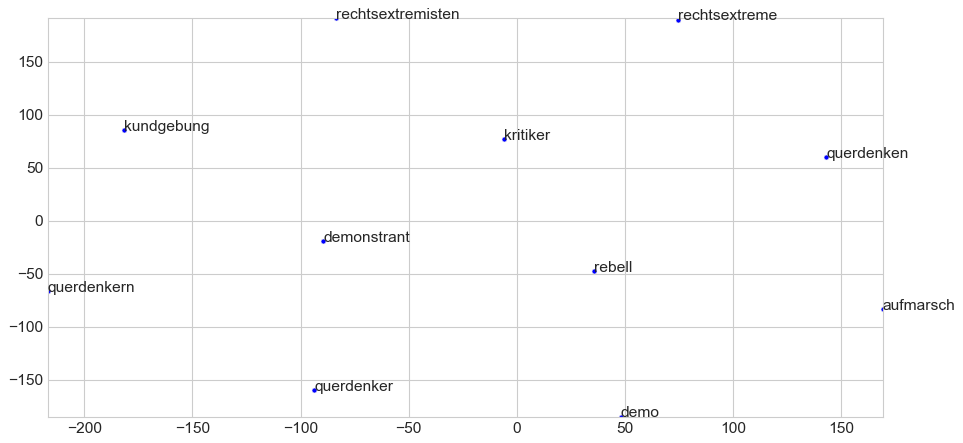

In [17]:
plot_closest_words(w2v_ac_al, 'querdenker', 'seaborn-whitegrid')